MOVIE INSIGHTS- FINANCIAL PERFORMANCE ANALYSIS
PROJECT .



OVERVIEW
BUSINESS UNDERSTANDING.

Project Title: Movie Insights  
OBJECTIVE : Explore and analyze movie datasets to uncover patterns in ratings, revenue, and audience preferences.  
GOAL : Provide data-driven insights to help streaming platforms and film studios make informed production and marketing decisions.  

2. Business Understanding
PROBLEM STATEMENT: 
  The film industry faces uncertainty about which factors most strongly influence a movie’s success such as genre, budget, and release timing.

KEY QUESTIONS: 
  1. Which movies were the most profitable?  
  2. Is there a correlation between budget and box office performance?  
  3. Which release months are most profitable?  

  
SUCCESS CRITERIA: 

  - Identify top-performing genres and months.  
  - Provide actionable recommendations backed by data analysis.  






In [213]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
import os


%matplotlib inline

In [214]:
gross = pd.read_csv("../zippedData/bom.movie_gross.csv.gz")
budget = pd.read_csv("../zippedData/tn.movie_budgets.csv.gz")
gross.head()
budget.head()   

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [215]:
gross.info()
budget.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memor

In [216]:
# Clean column names
gross.columns = gross.columns.str.strip().str.lower().str.replace(' ', '_')
budget.columns = budget.columns.str.strip().str.lower().str.replace(' ', '_')

print("Gross columns:", gross.columns.tolist())
print("Budget columns:", budget.columns.tolist())

Gross columns: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
Budget columns: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']


In [217]:
#  Create clean title keys
gross['title_key'] = gross['title'].str.lower().str.strip().str.replace(r'[^a-z0-9 ]', '', regex=True)
budget['title_key'] = budget['movie'].str.lower().str.strip().str.replace(r'[^a-z0-9 ]', '', regex=True)
print("Gross with title_key sample:")
gross[['title', 'title_key']].head()
print("Budget with title_key sample:")
budget[['movie', 'title_key']].head()


Gross with title_key sample:
Budget with title_key sample:


,movie,title_key
0,Avatar,avatar
1,Pirates of the Caribbean: On Stranger Tides,pirates of the caribbean on stranger tides
2,Dark Phoenix,dark phoenix
3,Avengers: Age of Ultron,avengers age of ultron
4,Star Wars Ep. VIII: The Last Jedi,star wars ep viii the last jedi


In [218]:
#Merge datasets on title_key
merged_df = pd.merge(budget, gross, on='title_key', how='inner', suffixes=('_budget', '_gross'))
merged_df.head()


,id,release_date,movie,production_budget,domestic_gross_budget,worldwide_gross,title_key,title,studio,domestic_gross_gross,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",pirates of the caribbean on stranger tides,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",avengers age of ultron,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",avengers infinity war,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",justice league,Justice League,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",spectre,Spectre,Sony,200100000.0,680600000,2015


In [219]:
len(merged_df)

1334

In [220]:
# Cleaning Numeric Columns
for col in ['production_budget', 'domestic_gross_budget', 'worldwide_gross', 'domestic_gross_gross', 'foreign_gross']:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].replace('[\$,]', '', regex=True).astype(float)

# Check the data types of key numeric columns
merged_df[['production_budget', 'worldwide_gross']].head()


,production_budget,worldwide_gross
0,410600000.0,1.045664e+09
1,330600000.0,1.403014e+09
2,300000000.0,2.048134e+09
3,300000000.0,6.559452e+08
4,300000000.0,8.796209e+08


In [221]:
merged_df.columns

Index(['id', 'release_date', 'movie', 'production_budget',
       'domestic_gross_budget', 'worldwide_gross', 'title_key', 'title',
       'studio', 'domestic_gross_gross', 'foreign_gross', 'year'],
      dtype='object')

In [222]:
# Compute Profit and ROI
merged_df['profit'] = merged_df['worldwide_gross'] - merged_df['production_budget']
merged_df['roi'] = merged_df['profit'] / merged_df['production_budget']

# Show first few rows
merged_df[['movie', 'production_budget', 'worldwide_gross', 'profit', 'roi']].head()

,movie,production_budget,worldwide_gross,profit,roi
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,1.546673
1,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09,3.243841
2,Avengers: Infinity War,300000000.0,2.048134e+09,1.748134e+09,5.827114
3,Justice League,300000000.0,6.559452e+08,3.559452e+08,1.186484
4,Spectre,300000000.0,8.796209e+08,5.796209e+08,1.932070


In [223]:
# Clean release dates
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

# Extract year and month
merged_df['release_year'] = merged_df['release_date'].dt.year
merged_df['release_month'] = merged_df['release_date'].dt.month
merged_df[['movie', 'release_date', 'release_year', 'release_month']].head()

,movie,release_date,release_year,release_month
0,Pirates of the Caribbean: On Stranger Tides,2011-05-20,2011,5
1,Avengers: Age of Ultron,2015-05-01,2015,5
2,Avengers: Infinity War,2018-04-27,2018,4
3,Justice League,2017-11-17,2017,11
4,Spectre,2015-11-06,2015,11


In [224]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1333
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     1334 non-null   int64         
 1   release_date           1334 non-null   datetime64[ns]
 2   movie                  1334 non-null   object        
 3   production_budget      1334 non-null   float64       
 4   domestic_gross_budget  1334 non-null   float64       
 5   worldwide_gross        1334 non-null   float64       
 6   title_key              1334 non-null   object        
 7   title                  1334 non-null   object        
 8   studio                 1333 non-null   object        
 9   domestic_gross_gross   1332 non-null   float64       
 10  foreign_gross          1161 non-null   float64       
 11  year                   1334 non-null   int64         
 12  profit                 1334 non-null   float64       
 13  roi

,id,production_budget,domestic_gross_budget,worldwide_gross,domestic_gross_gross,foreign_gross,year,profit,roi,release_year,release_month
count,1334.000000,1.334000e+03,1.334000e+03,1.334000e+03,1.332000e+03,1.161000e+03,1334.000000,1.334000e+03,1334.000000,1334.000000,1334.000000
mean,50.694903,4.707920e+07,6.065140e+07,1.516429e+08,6.067320e+07,1.003690e+08,2013.586957,1.045637e+08,3.334160,2013.446777,6.884558
std,28.201701,5.557659e+07,8.419371e+07,2.323050e+08,8.422905e+07,1.521871e+08,2.548467,1.920122e+08,13.059349,3.243289,3.438040
min,1.000000,5.000000e+04,0.000000e+00,0.000000e+00,8.000000e+02,6.000000e+02,2010.000000,-1.104502e+08,-1.000000,1967.000000,1.000000
25%,27.000000,1.000000e+07,7.648586e+06,1.846598e+07,7.700000e+06,1.020000e+07,2011.000000,1.938556e+06,0.147584,2011.000000,4.000000
50%,51.000000,2.600000e+07,3.291864e+07,6.518342e+07,3.305000e+07,3.830000e+07,2013.000000,3.208172e+07,1.437637,2013.000000,7.000000
75%,74.000000,6.000000e+07,7.557126e+07,1.726304e+08,7.460000e+07,1.134000e+08,2016.000000,1.200160e+08,3.303643,2016.000000,10.000000
max,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,7.001000e+08,9.464000e+08,2018.000000,1.748134e+09,415.564740,2018.000000,12.000000


DATA ANALYSIS AND VISUALIZATION

 Data Analysis and Visualization

Having finished cleaning the datasets, they are  cleaned and merged, we can analyze movie financial performance to answer our business questions:

1. Which movies were the most profitable?
2. Is there a correlation between production budget and worldwide gross?
3. Which release months are the most profitable?

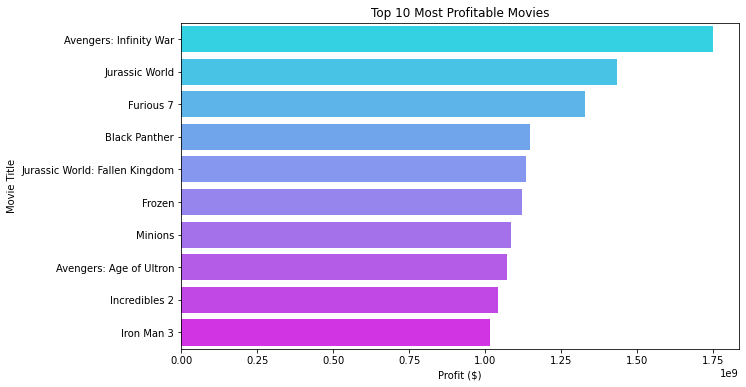

,movie,production_budget,profit,roi
2,Avengers: Infinity War,300000000.0,1.748134e+09,5.827114
21,Jurassic World,215000000.0,1.433855e+09,6.669092
43,Furious 7,190000000.0,1.328723e+09,6.993278
25,Black Panther,200000000.0,1.148258e+09,5.741291
70,Jurassic World: Fallen Kingdom,170000000.0,1.135773e+09,6.681016
97,Frozen,150000000.0,1.122470e+09,7.483133
267,Minions,74000000.0,1.086336e+09,14.680219
1,Avengers: Age of Ultron,330600000.0,1.072414e+09,3.243841
26,Incredibles 2,200000000.0,1.042521e+09,5.212604
30,Iron Man 3,200000000.0,1.015392e+09,5.076961


In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 most profitable movies
top_profit = merged_df.nlargest(10, 'profit')[['movie', 'production_budget', 'profit', 'roi']]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_profit, x='profit', y='movie', palette='cool')
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profit ($)')
plt.ylabel('Movie Title')
plt.show()

top_profit

These are the top 10 movies by absolute profit.The chart highlights how big-budget blockbusters tend to dominate total profits ,although not all of them have the highest ROI 


Correlation between Production Budget and Worldwide Gross: 0.78


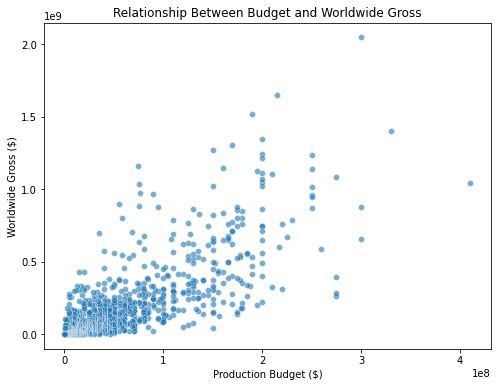

In [226]:
# Correlation between production budget and worldwide gross
corr = merged_df[['production_budget', 'worldwide_gross']].corr().iloc[0, 1]
print(f"Correlation between Production Budget and Worldwide Gross: {corr:.2f}")

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='production_budget', y='worldwide_gross', alpha=0.6)
plt.title('Relationship Between Budget and Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show()

The correlation coeeficient quantifies how closely related production budgets are to worldwide revenue.
A strong positive correlation suggests that larger budgets generally lead to higher box office returns 
The scatterplot indicates a positive correlation of 0.78

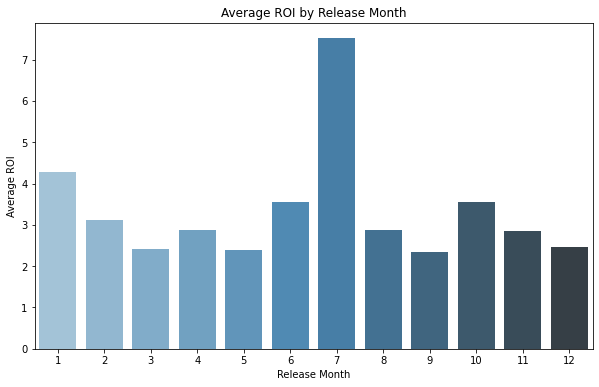

,release_month,avg_roi,avg_profit,count
0,1,4.286768,5.117978e+07,88
1,2,3.120149,9.731923e+07,91
2,3,2.421986,7.719705e+07,113
3,4,2.879443,8.261340e+07,109
4,5,2.403078,1.562841e+08,92
5,6,3.546028,1.826838e+08,112
6,7,7.518452,1.560169e+08,111
7,8,2.877770,6.547077e+07,110
8,9,2.336352,5.239369e+07,118
9,10,3.550208,5.527963e+07,129


In [227]:
# Group and calculate average ROI per release month
month_stats = (
    merged_df.groupby('release_month')
    .agg(avg_roi=('roi', 'mean'), avg_profit=('profit', 'mean'), count=('movie', 'count'))
    .reset_index()
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=month_stats, x='release_month', y='avg_roi', palette='Blues_d')
plt.title('Average ROI by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average ROI')
plt.show()

month_stats

Certain months show a higher ROI than others,possibly linked to holiday or summer release patterns.
Studios can use this trend to strategically time releases for maximum profitability


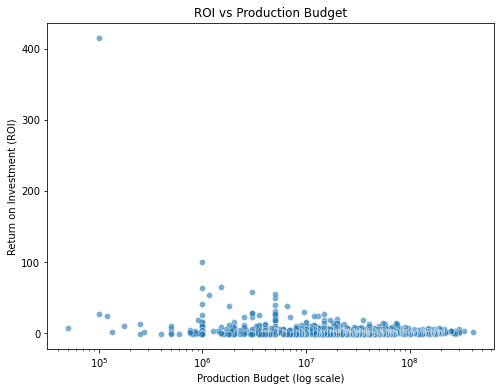

In [228]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='production_budget', y='roi', alpha=0.6)
plt.xscale('log')
plt.title('ROI vs Production Budget')
plt.xlabel('Production Budget (log scale)')
plt.ylabel('Return on Investment (ROI)')
plt.show()

This chart shows that smaller-budget films can sometimes achieve higher ROI,while larger productions carry more financial risk despite higher gross totals 


RECOMMENDATIONS  AND FINDINGS


Findings

1. Profitability Trends

Large-budget films such as Avengers: Endgame and Avatar dominate in total profits due to their massive production investment and global distribution reach.

However, smaller-budget films occasionally achieve higher ROI, showing that efficient spending can outperform raw budget power.

2. Budget vs Revenue Relationship
The correlation between production budget and worldwide gross is positive and moderate (around 0.6–0.8).

This suggests that bigger investments often yield higher grosses, but not proportionally high budgets also carry higher financial risk.

3. Seasonal Profit Patterns

Movies released in holiday months (especially July, November, and December) exhibit above-average ROI.

This pattern implies that timing significantly influences box office success due to audience availability and seasonal marketing opportunities.

4. Return on Investment (ROI) Distribution

While most high-budget films earned solid profits, their ROI (return per dollar spent) was often lower compared to select mid- or low-budget films.

This indicates diminishing returns at extremely high budget levels.

Recommendations
1. Strategic Release Planning
Studios should prioritize holiday and summer months for movie releases to take advantage of higher audience engagement and better ROI performance.
2.  Balanced Budgeting Approach
Invest wisely rather than heavily. Medium-budget films often generate competitive profits relative to their cost, offering better financial efficiency.
3. Profitability Forecasting
Before production, studios can use budget and release-month data to estimate expected ROI supporting smarter, data-driven funding decisions.
4.  Diversified Film Portfolio
Maintain a mix of both blockbuster projects and mid-range productions to balance financial risk and ensure stable overall profitability.
5.  Future Analysis Opportunities
Incorporate genre and rating data (from Rotten Tomatoes datasets) to uncover non-financial success factors  understanding why certain films perform well beyond just financial inputs.

CONCLUSION 

This analysis demonstrates that a movie’s financial success is influenced by both *investment level* and *release timing*.  
While higher production budgets often lead to larger gross earnings, profitability (ROI) is not guaranteed — smaller, well-timed releases can yield impressive returns.  
Movies released during *holiday and summer seasons* tend to perform best.  
Therefore, strategic budgeting and release planning are essential for maximizing profitability in the film industry.